# Random Matrix Results

This notebook demonstrates three important results from the study of random matrices: Wigner's surmise, the semmicircle law and the Tracy-Widom distribution.

In [95]:
using RandomMatrices, Distributions, LinearAlgebra, Plots
gr()
default(leg=false)

# Wigner's Surmise

Wigner's surmise is the PDF of the difference between the two eigenvalues of a 2x2 random matrix. The simplification given here takes a matrix:

\begin{pmatrix}
x_1 & x_3\\
x_3 & x_2
\end{pmatrix}

Where the random variables, $x_i$, are drawn from normal distributions, $x_1$ and $x_2$ with variance 1 and $x_3$ with variance $^1/_2$. Wigner's Surmise in this case is given by (and derived in [this lecture](https://www.youtube.com/watch?v=Je4bU3g_QGk)):

$$\frac{1}{2}x e^{-\frac{x^2}{4}}$$

In [96]:
t=50000  # trials
s=[]

dist1 = Normal(0, 1)         # σ=1
dist2 = Normal(0, 1/sqrt(2)) # σ=1/√2
for i in 1:t
    # Sample GOE with the given variances
    x1 = rand(dist1)
    x2 = rand(dist1)
    x3 = rand(dist2)
    mat = [x1 x3; x3 x2]
    l1, l2 = eigvals(mat)
    push!(s, abs(l1-l2))
end

In [97]:
wigners_surmise(x) = (1/2)x*exp(-(x^2)/4)

wigners_surmise (generic function with 1 method)

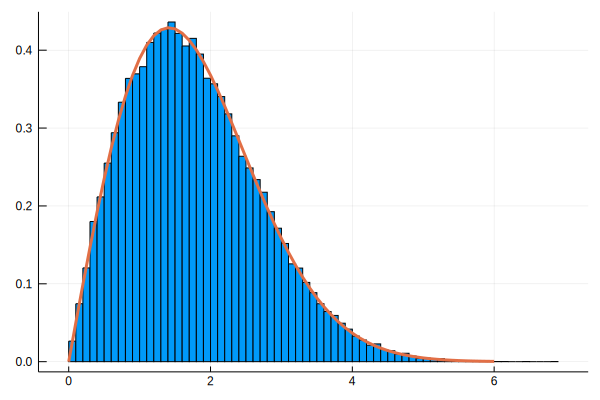

In [98]:
plot(histogram(s, normalize=:pdf))
plot!(0:0.1:6, wigners_surmise, lw=3)

# Wigner semicircle distribution

Named after the physicist Eugene Wigner and arises as the limiting distribution of eigenvalues of many random symmetric matrices as the size of the matrix approaches infinity.

In [89]:
n = 100  # matrix size
t = 5000 # trials
v = []   # eigenvalue samples

for i in 1:t
    # Sample GOE and collect their eigenvalues
    a=randn(n,n)  # random nxn matrix of random Gaussians
    s=(a+a')/2 # symmetric matrix
    append!(v, eigvals(s)) # all eigenvalues
end

v=v/sqrt(n/2) # normalize eigenvalues

return

In [90]:
semicircle(x)=sqrt(4-x^2)/(2*pi)

semicircle (generic function with 1 method)

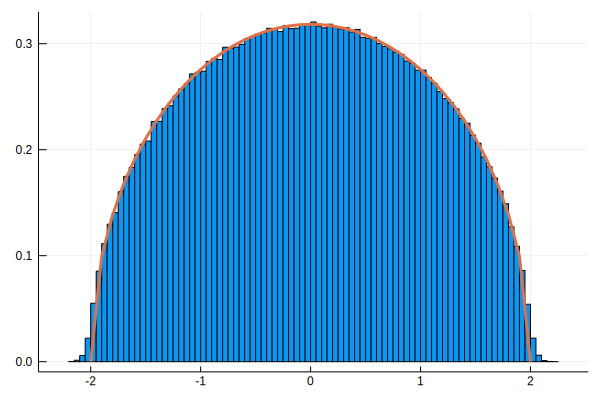

In [91]:
histogram(v, normed=true)
plot!(-2:0.1:2, semicircle, lw=3)

# Tracy–Widom distribution
Introduced by Craig Tracy and Harold Widom (1993, 1994), is the probability distribution of the normalized largest eigenvalue of a random Hermitian matrix.

In [92]:
n = 100  # matrix size
t = 10000 # trials
vl = []  # largest eigenvalue samples

for i in 1:t
    # Sample GUE and collect their largest eigenvalues
    a=randn(ComplexF64, (n,n)) # random nxn complex matrix
    s=(a+a')/2 ; # Hermitian matrix
    append!(vl, maximum(eigvals(s))) # largest eigenvalue
end

vl=sqrt(2)*n^(1/6)*(vl.-sqrt(2*n)) # normalized largest eigenvalues

nothing

In [93]:
# Approximation of the Tracy-Widom distribution.
# See paper M.Chiani, "Distribution of the largest eigenvalue for real 
# Wishart and Gaussian random matrices and a simple approximation for the 
# Tracy-Widom distribution", submitted 2012, ArXiv
using SpecialFunctions

k = 79.6594870666346
θ = 0.10103655775856243
α = 9.819607173436484

pdfgamma(x, θ, k) = 1/(gamma(k)*θ^k) * x^(k - 1) .* exp(-x/θ)
tracy_widom(x) = pdfgamma(x+α, θ, k)

tracy_widom (generic function with 2 methods)

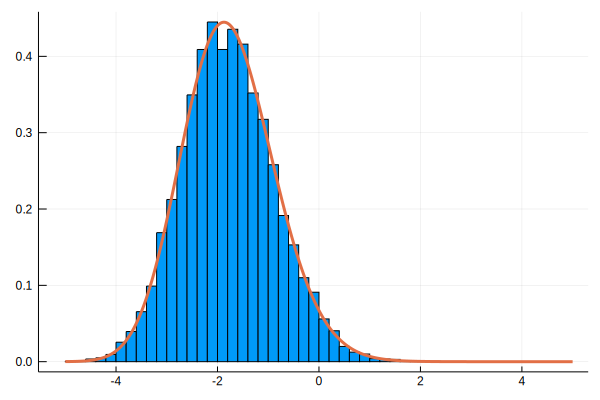

In [94]:
histogram(vl, normed=true)
plot!(-5:0.01:5, tracy_widom, lw=3)